In [3]:
%%capture
import keras
import tensorflow as tf
import torch
import jax

2025-10-10 17:29:14.141313: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-10 17:29:15.076649: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
print('Keras:', keras.__version__)
print('Tensorflow:', tf.__version__)
print('PyTorch:', torch.__version__)
print('JAX:', jax.__version__)

Keras: 3.11.3
Tensorflow: 2.20.0
PyTorch: 2.8.0+cu129
JAX: 0.7.2


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step


In [7]:
x_train_normalized = x_train.astype('float32') / 255.
x_test_normalized = x_test.astype('float32') / 255.

In [15]:
noise_train = np.random.normal(loc=0., scale=0.6, size=x_train.shape)
noise_test = np.random.normal(loc=0., scale=0.6, size=x_test.shape)

In [19]:
x_train_noisy = x_train_normalized + 0.5*noise_train
x_test_noisy = x_test_normalized + 0.5*noise_test

In [20]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

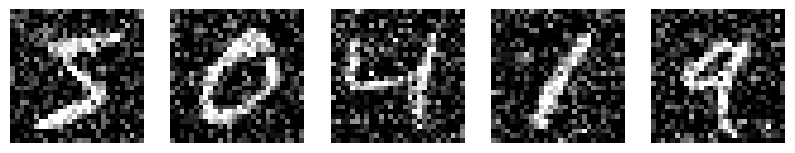

In [21]:
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(x_train_noisy[i], cmap='gray')
    ax.set_axis_off()

In [24]:
x_train_noisy_vector = x_train_noisy.reshape(-1, 784)
x_test_noisy_vector = x_test_noisy.reshape(-1, 784)

x_train_vector = x_train_normalized.reshape(-1, 784)
x_test_vector = x_test_normalized.reshape(-1, 784)

In [26]:
inputs = keras.Input(shape=(784,))
encoder_layer = keras.layers.Dense(16, activation='relu')(inputs)
decoder_layer = keras.layers.Dense(784, activation='sigmoid')(encoder_layer)

autoencoder = keras.Model(inputs, decoder_layer)

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 784)            │        13,328 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,888 (101.12 KB)

 Trainable params: 25,888 (101.12 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=['accuracy'])

In [29]:
history = autoencoder.fit(x_train_noisy_vector,
                          x_train_vector,
                          epochs=30,
                          batch_size=256,
                          validation_split=0.2)

Epoch 1/30


2025-10-10 17:47:05.551523: I external/local_xla/xla/service/service.cc:163] XLA service 0x72efd0008f10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-10 17:47:05.551571: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-10-10 17:47:05.614011: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-10 17:47:05.846930: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
2025-10-10 17:47:06.806829: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_131', 4 bytes spill stores, 4 bytes spill loads



 20/188 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0010 - loss: 0.6664

I0000 00:00:1760105828.606346   78726 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.0080 - loss: 0.3167 - val_accuracy: 0.0131 - val_loss: 0.2570
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0111 - loss: 0.2331 - val_accuracy: 0.0098 - val_loss: 0.2078
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0098 - loss: 0.1942 - val_accuracy: 0.0105 - val_loss: 0.1830
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0096 - loss: 0.1755 - val_accuracy: 0.0113 - val_loss: 0.1694
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0114 - loss: 0.1642 - val_accuracy: 0.0137 - val_loss: 0.1606
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0107 - loss: 0.1572 - val_accuracy: 0.0117 - val_loss: 0.1551
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0106 - loss: 0.1526 - val_accuracy: 0.0118 - val_loss: 0.1512
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.0104 - loss: 0.1493 - val_accuracy: 0.01

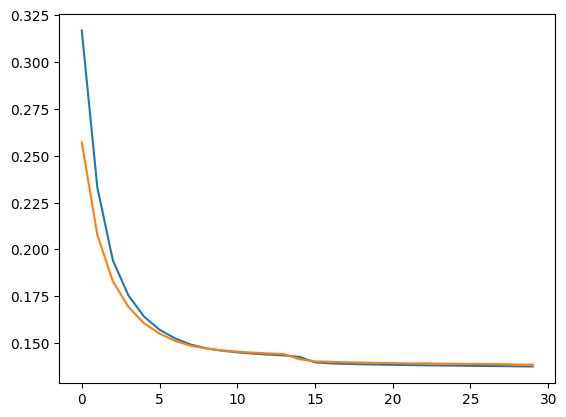

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

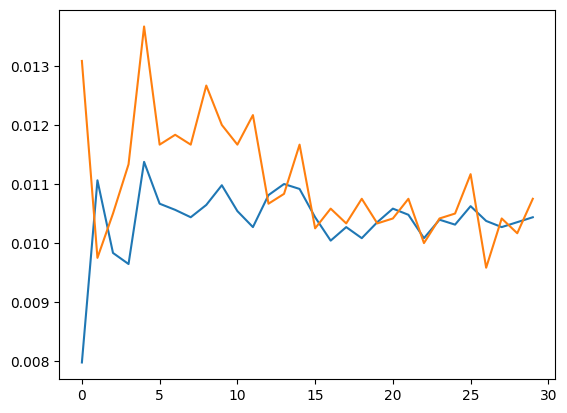

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [32]:
preds = autoencoder.predict(x_test_noisy_vector)

2025-10-10 17:51:30.226766: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 4 bytes spill stores, 4 bytes spill loads

2025-10-10 17:51:30.473854: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 4 bytes spill stores, 4 bytes spill loads



312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

2025-10-10 17:51:32.637478: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 4 bytes spill stores, 4 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


In [34]:
encoder_model = keras.Model(inputs, encoder_layer)
encoder_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │        12,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,560 (49.06 KB)

 Trainable params: 12,560 (49.06 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
encoded_images = encoder_model.predict(x_test_noisy_vector)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [36]:
encoded_images.shape

(10000, 16)

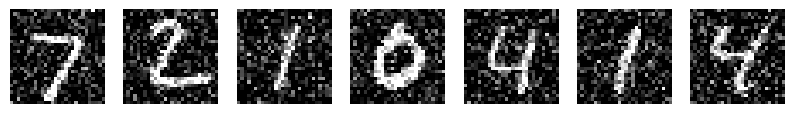

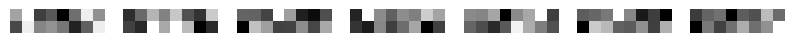

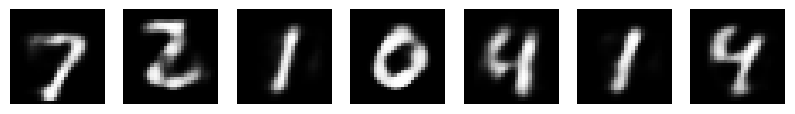

In [37]:
fig, axes = plt.subplots(1, 7, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(x_test_noisy[i], cmap='gray')
    ax.set_axis_off()

fig, axes = plt.subplots(1, 7, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(encoded_images[i].reshape(2, 8), cmap='gray')
    ax.set_axis_off()

fig, axes = plt.subplots(1, 7, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(preds[i].reshape(28, 28), cmap='gray')
    ax.set_axis_off()

In [38]:
x_train_cnn_noisy = np.reshape(x_train_noisy, (len(x_train), 28, 28, 1))
x_test_cnn_noisy = np.reshape(x_test_noisy, (len(x_test), 28, 28, 1))

In [39]:
from keras import layers, Model

In [41]:
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, 3, activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D()(x)

# at this point the representation is (7, 7, 32)

x = layers.Conv2D(32, 3, activation='relu', padding='same')(encoded)
x = layers.UpSampling2D()(x)
x = layers.Conv2D(16, 3, activation='relu', padding='same')(x)
x = layers.UpSampling2D()(x)
decoded = layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)

autoencoder_cnn = Model(input_img, decoded)

autoencoder_cnn.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

autoencoder_cnn.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,817 (73.50 KB)

 Trainable params: 18,817 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:

history_cnn = autoencoder_cnn.fit(x_train_cnn_noisy, x_train_normalized,
                                  epochs=30,
                                  batch_size=256,
                                  validation_split=0.2)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8064 - loss: 0.2187 - val_accuracy: 0.8115 - val_loss: 0.1139
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8120 - loss: 0.1048 - val_accuracy: 0.8136 - val_loss: 0.1002
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8130 - loss: 0.0968 - val_accuracy: 0.8145 - val_loss: 0.0959
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8135 - loss: 0.0932 - val_accuracy: 0.8142 - val_loss: 0.0927
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8138 - loss: 0.0907 - val_accuracy: 0.8146 - val_loss: 0.0903
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8140 - loss: 0.0889 - val_accuracy: 0.8147 - val_loss: 0.0889
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8141 - loss: 0.0876 - val_accuracy: 0.8149 - val_loss: 0.0877
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8142 - loss: 0.0866 - val_acc

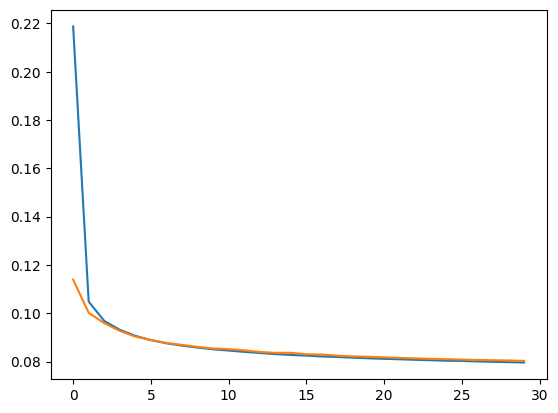

In [43]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])

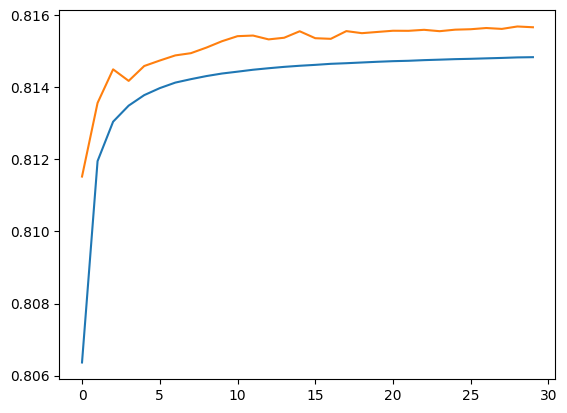

In [44]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

In [45]:
preds_cnn = autoencoder_cnn.predict(x_test_cnn_noisy)
encoder_model_cnn = keras.Model(input_img, encoded)
encoder_model_cnn.summary()
encoded_images = encoder_model_cnn.predict(x_test_cnn_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,800 (18.75 KB)

 Trainable params: 4,800 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [48]:
encoded_images[0][:,:,0].shape

(7, 7)

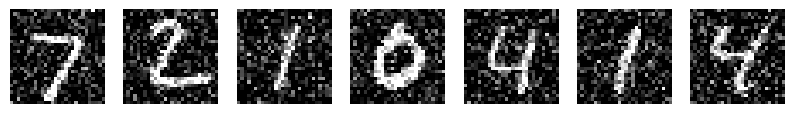

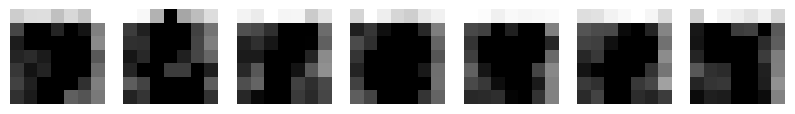

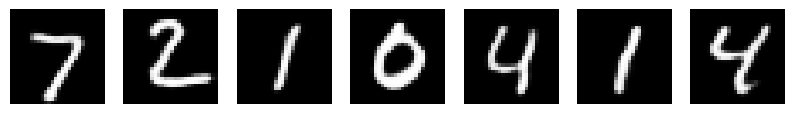

In [56]:
fig, axes = plt.subplots(1, 7, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(x_test_noisy[i], cmap='gray')
    ax.set_axis_off()

fig, axes = plt.subplots(1, 7, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(encoded_images[i][:,:,30], cmap='gray')
    ax.set_axis_off()

fig, axes = plt.subplots(1, 7, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(preds_cnn[i], cmap='gray')
    ax.set_axis_off()